## ML: REGRESSION MODEL

In [1]:
import pandas as pd

# Load the first dataset: Customer Flight Activity
file_path_flight_activity = r'/Users/emmanuel_bamidele/Desktop/Bamspace/Data_Science_Tutorial/Books/Software for STEM Grad Students/Data/ML_Data_Customer Flight Activity.csv'
flight_activity_data = pd.read_csv(file_path_flight_activity)

# Displaying the first few rows of the dataset for a basic overview
flight_activity_data.head()


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [3]:
# Checking for missing values
missing_values = flight_activity_data.isnull().sum()

missing_values


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [4]:
# Basic statistical summary
statistical_summary = flight_activity_data.describe()
statistical_summary

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparing data for Linear Regression
X = flight_activity_data[['Distance', 'Points Accumulated', 'Flights Booked']]
y = flight_activity_data['Total Flights']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Linear Regression model
linear_model = LinearRegression()

# Training the model
linear_model.fit(X_train, y_train)

# Predicting on test data
y_pred = linear_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(3.028821913955159, 0.9286563378015527)

In [8]:
from sklearn.tree import DecisionTreeRegressor

# Preparing data for Decision Tree Regression
X = flight_activity_data[['Distance', 'Points Accumulated', 'Flights Booked']]
y = flight_activity_data['Total Flights']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Training the model
decision_tree_model.fit(X_train, y_train)

# Predicting on test data
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred_tree)
r2 = r2_score(y_test, y_pred_tree)

mse, r2


(1.9955751656996108, 0.9529943837710257)

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Preparing data for Random Forest Regression
X = flight_activity_data[['Distance', 'Points Accumulated', 'Flights Booked']]
y = flight_activity_data['Total Flights']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Random Forest Regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
random_forest_model.fit(X_train, y_train)

# Predicting on test data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

mse, r2


(1.8743073342196979, 0.955850838013112)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generating polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Splitting the polynomial data into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Creating a polynomial regression model by applying linear regression on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predicting on test data
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluating the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

mse_poly, r2_poly

(2.9035397572806234, 0.9316073491581792)

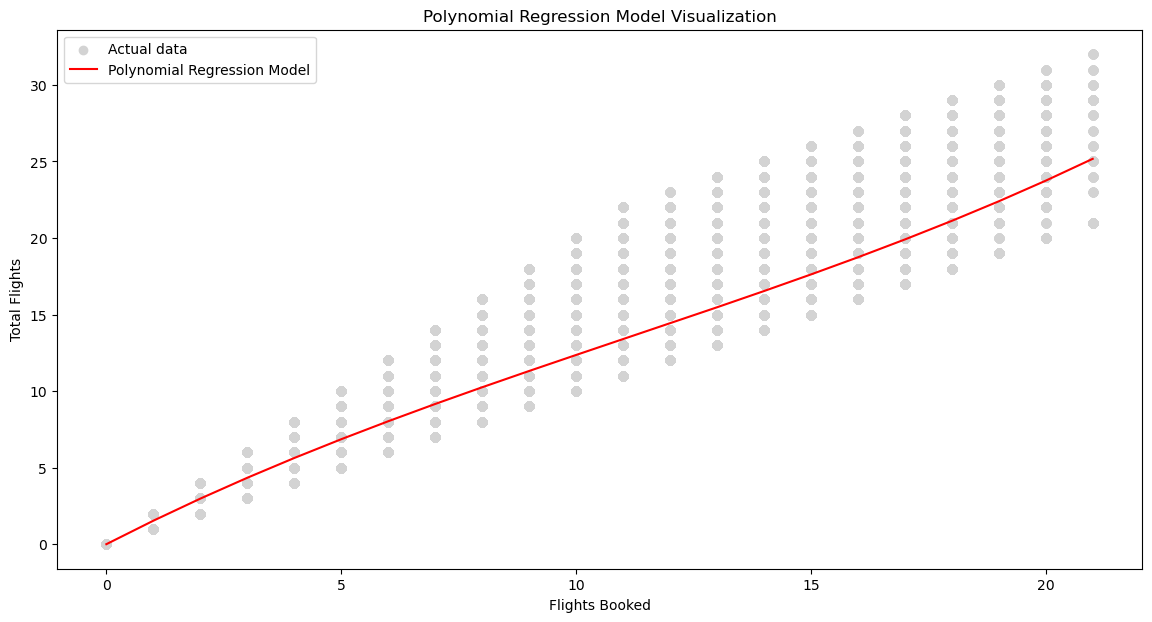

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# We will visualize the models for one feature for simplicity. Let's choose 'Flights Booked'.
# Extracting the 'Flights Booked' feature from the original dataset
X_flight_booked = flight_activity_data[['Flights Booked']]
y = flight_activity_data['Total Flights']

# Polynomial Features for 'Flights Booked'
poly_flight_booked = PolynomialFeatures(degree=3)
X_flight_booked_poly = poly_flight_booked.fit_transform(X_flight_booked)

# Splitting the flight_booked data into training and testing sets
X_train_flight_booked_poly, X_test_flight_booked_poly, y_train, y_test = train_test_split(X_flight_booked_poly, y, test_size=0.3, random_state=42)

# Training the Polynomial Regression model on 'Flights Booked' only
poly_model_flight_booked = LinearRegression()
poly_model_flight_booked.fit(X_train_flight_booked_poly, y_train)

# Predicting using the Polynomial Regression model
X_flight_booked_all_poly = poly_flight_booked.transform(X_flight_booked)
y_pred_flight_booked_all_poly = poly_model_flight_booked.predict(X_flight_booked_all_poly)

# Sorting the values for a smoother line plot
sorted_zip = sorted(zip(X_flight_booked.values, y_pred_flight_booked_all_poly))
X_flight_booked_sorted, y_pred_flight_booked_sorted = zip(*sorted_zip)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.scatter(X_flight_booked, y, color='lightgray', label='Actual data')
plt.plot(X_flight_booked_sorted, y_pred_flight_booked_sorted, color='red', label='Polynomial Regression Model')
plt.xlabel('Flights Booked')
plt.ylabel('Total Flights')
plt.title('Polynomial Regression Model Visualization')
plt.legend()
plt.show()


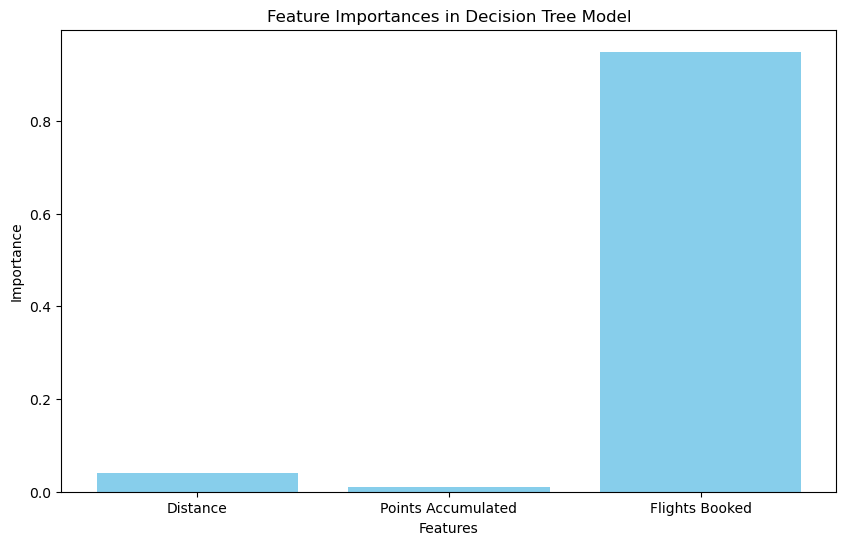

In [18]:
#Feature Importance for Decision Tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Preparing data for Decision Tree Regression
X = flight_activity_data[['Distance', 'Points Accumulated', 'Flights Booked']]
y = flight_activity_data['Total Flights']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Training the model
decision_tree_model.fit(X_train, y_train)

# Feature importance evaluation
feature_importances = decision_tree_model.feature_importances_

# Create a bar chart for feature importance visualization
features = X.columns
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances, color='skyblue')
plt.title('Feature Importances in Decision Tree Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()
